In [5]:
import pandas as pd

# Memuat data
file_path = 'dataKasus-1.xlsx'  # Pastikan file excel disimpan di lokasi yang benar
data_2022 = pd.read_excel(file_path, sheet_name='2022')

# Menampilkan 5 baris pertama data
data_2022.head()


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


   NO    NAMA  USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1    23        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2    29        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3    20        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4    18        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5    34        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tidak                              Ada         >UMR        PE         NaN  
2  Tidak                            Tidak         >UMR    Non PE         NaN  
3  Tidak                            Tidak         >UMR    Non PE         NaN  
4  Tidak                            Tidak         >UMR    Non PE         NaN  
               NO        USIA     PARITAS
count  56

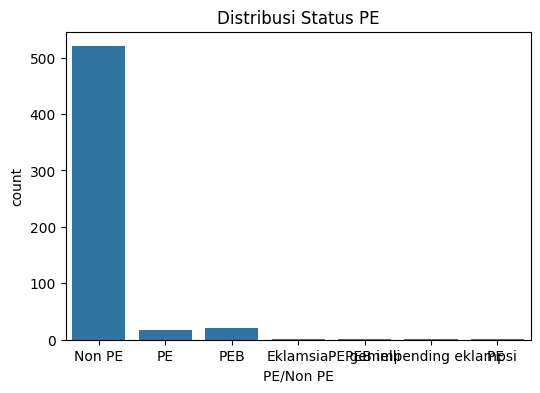

In [8]:
import pandas as pd

# Mengubah kolom 'USIA' agar menjadi numerik
data_2022['USIA'] = data_2022['USIA'].str.replace(' TH', '')

# Menghapus semua karakter non-digit
data_2022['USIA'] = data_2022['USIA'].str.replace(r'\D', '', regex=True)

# Mengisi NaN dengan nilai rata-rata (mean)
data_2022['USIA'] = data_2022['USIA'].replace('', pd.NA)  # Mengganti string kosong dengan NaN
data_2022['USIA'] = data_2022['USIA'].fillna(data_2022['USIA'].astype(float).mean())

# Mengonversi ke integer
data_2022['USIA'] = data_2022['USIA'].astype(int)

# Menampilkan 5 baris pertama
print(data_2022.head())

# Statistik deskriptif
print(data_2022.describe())

# Visualisasi distribusi PE dan Non-PE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=data_2022['PE/Non PE'])
plt.title('Distribusi Status PE')
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Misalkan 'PE/Non PE' adalah kolom target
y = data_2022['PE/Non PE']
X = data_2022.drop(columns=['PE/Non PE'])  # Menghapus kolom target dari fitur

# Memeriksa dan menampilkan kolom dalam DataFrame X
print(X.columns)

# Mengisi NaN di y dengan modus
y.fillna(y.mode()[0], inplace=True)

# Menghapus baris yang memiliki NaN baik di X maupun di y
# Menggabungkan X dan y menjadi satu DataFrame untuk menghapus NaN
data_combined = pd.concat([X, y], axis=1).dropna()

# Memisahkan kembali X dan y setelah menghapus NaN
X_cleaned = data_combined.drop(columns=['PE/Non PE'])
y_cleaned = data_combined['PE/Non PE']

# Encoding kolom kategorikal jika ada
X_encoded = pd.get_dummies(X_cleaned, drop_first=True)

# Memeriksa jumlah baris
print("Jumlah baris di X_encoded:", X_encoded.shape[0])
print("Jumlah baris di y:", y_cleaned.shape[0])

# Memisahkan dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_cleaned, test_size=0.2, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi
y_pred = model.predict(X_test)


Index(['NO', 'NAMA', 'USIA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI',
       'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA',
       'SOSEK RENDAH', 'Unnamed: 12'],
      dtype='object')
Jumlah baris di X_encoded: 9
Jumlah baris di y: 9
